Diabetes Prediction
---

A classifier is built using Naïve Bayesian technique that predicts whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. This dataset is originally obtained from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Step 1:
**Import**: Pandas, NumPy, InterTools, SeaBorn, Matplotlib and Random libraries.

In [1]:
import pandas as pd
import numpy as np
import itertools as IT
import seaborn as sn
import matplotlib.pyplot as plt
import random

### Step 2:
**Read CSV/Data Set:** A read function that uses Pandas API to load files (training and test) as a Panda’s data frame.

In [2]:
def readCSV():
    trainingSet = pd.read_csv("train.csv",names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
    testSet = pd.read_csv("test.csv",names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
    return [trainingSet, testSet]

### Step 3:
**Spliting Data based on 'Outcome' Column:** A function that splits the training dataset into two separate datasets having 'Outcome' attribute values as 0 and 1 respectively.

In [3]:
def splitOutcome(dataset):
    outcome = dataset.groupby('Outcome')
    return [outcome.get_group(1),outcome.get_group(0)]

### Step 4:
**Calculating 𝜇 and σ:** A function that calculates Mean(𝜇) and Standard Deviation (σ) for each column of the dataset.

In [4]:
def printMean_and_SD(dataSet): 
    m = dataSet.mean(axis = 0)
    n = dataSet.std(axis = 0)
    return m,n

### Step 5:
**Calculating Normal Distribution Likelihood:** A function that calculates normal distribution likelihood or Gaussian Distribution for each of the row of the dataset.

In [5]:
def GaussianFunction(m, sd, item):
    p = (1/(sd*2.5066))*pow(2.718,(-0.5*(pow((item-m)/sd,2))))
    return (p)

### Step 6:
**Classification:** A function that classifies the test data based on the predicted values for it's 'Outcome'.

In [6]:
def Classifier(p1, p2):
    if p1 > p2:
        return 1
    else:
        return 0

### Step 7:
**A function to evaluate the attributess of a confusion matrix.**

In [7]:
def Prediction_Matching(PredictedValues, testsetoutcome):
    
    sum = TP = TN = FP = FN = 0;
    
    for (i,j) in IT.zip_longest(PredictedValues,testsetoutcome):
        
        if i==j:
            sum += 1
        if i==j==1:
            TP += 1
        elif i==0 and j==0:
            TN += 1
        elif i==1 and j==0:
            FP += 1
        else:
            FN += 1
    
    sum = (sum/len(testsetoutcome))*100     #Evaluation of accuracy by counting classified and misclassified points
    return (sum, TP, TN, FP, FN)

# True positives (TP): the cases for which the classifier predicted ‘diabetic’ and the females were actually diabetic.
# True negatives (TN): the cases for which the classifier predicted ‘non diabetic’ and the females were actually not diabetic.
# False positives (FP): the cases for which the classifier predicted ‘diabetic’ but the females were actually not diabetic.
# False negatives (FN): the cases for which the classifier predicted ‘non diabetic’ but the females were actually diabetic.

### Step 8:  
**An evaluation of accuracy, error, sensitivity and specificity by using confusion matrix attributes.**

### Calculation of Accuracy, Error, Sensitivity, and Specificity Values
$$Accuracy = \frac{TP + TN)}{(TP + FP + TN +FN)}$$<br>     
$$Error = \frac{(FP + FN)}{(TP + FP + TN +FN)}$$<br>
$$Sensitivity = \frac{TP}{(FN + TP)}$$<br>
$$Specificity = \frac{TN}{(TN + FP)}$$<br>

In [8]:
def Analytics(TP, TN, FP, FN):
    
    Accuracy = (TP + TN) / (TP + FP + TN +FN)     #evaluation of accuracy by using confusion matrix
    Error = (FP + FN) / (TP + FP + TN +FN)
    Sensitivity = TP / (FN + TP)
    Specificity = TN / (TN + FP)
    
    print ('Estimations obtained by using Naïve Bayes Classifier:\n')
    print ('Accuracy (Classification Error) = {0} %'.format(Accuracy*100))
    print ('Classifier Error = {0} %'.format(Error*100))
    print ('Classifier Sensitivity = {0} %'.format(Sensitivity*100))
    print ('Classifier Specificity = {0} %'.format(Specificity*100))
    print()
    

In [9]:
def CalculateColumnProb(m1,sd1,m0,sd0,testSet):
    
    PredictedValues = []
    
    for row in testSet.itertuples():
        p1 = GaussianFunction(m1.Pregnancies,sd1.Pregnancies,row.Pregnancies)
        p2 = GaussianFunction(m1.Glucose,sd1.Glucose,row.Glucose)
        p3 = GaussianFunction(m1.BloodPressure,sd1.BloodPressure,row.BloodPressure)
        p4 = GaussianFunction(m1.SkinThickness,sd1.SkinThickness,row.SkinThickness)
        p5 = GaussianFunction(m1.Insulin,sd1.Insulin,row.Insulin)
        p6 = GaussianFunction(m1.BMI,sd1.BMI,row.BMI)
        p7 = GaussianFunction(m1.DiabetesPedigreeFunction,sd1.DiabetesPedigreeFunction,row.DiabetesPedigreeFunction)
        p8 = GaussianFunction(m1.Age,sd1.Age,row.Age)
        
        prob1 = p1*p2*p3*p4*p5*p6*p7*p8
        
        p1 = GaussianFunction(m0.Pregnancies,sd0.Pregnancies,row.Pregnancies)
        p2 = GaussianFunction(m0.Glucose,sd0.Glucose,row.Glucose)
        p3 = GaussianFunction(m0.BloodPressure,sd0.BloodPressure,row.BloodPressure)
        p4 = GaussianFunction(m0.SkinThickness,sd0.SkinThickness,row.SkinThickness)
        p5 = GaussianFunction(m0.Insulin,sd0.Insulin,row.Insulin)
        p6 = GaussianFunction(m0.BMI,sd0.BMI,row.BMI)
        p7 = GaussianFunction(m0.DiabetesPedigreeFunction,sd0.DiabetesPedigreeFunction,row.DiabetesPedigreeFunction)
        p8 = GaussianFunction(m0.Age,sd0.Age,row.Age)
        
        prob2 = p1*p2*p3*p4*p5*p6*p7*p8
        
        ClassifiedValue = Classifier(prob1, prob2)
        if ClassifiedValue == 1:
            PredictedValues.append(1)
        else:
            PredictedValues.append(0)
            
    return (PredictedValues)

Estimations obtained by using Naïve Bayes Classifier:

Accuracy (Classification Error) = 74.01574803149606 %
Classifier Error = 25.984251968503933 %
Classifier Sensitivity = 72.3404255319149 %
Classifier Specificity = 75.0 %

Confusion Matrix:
          ______________________________________________
         |      Predicted:        |      Predicted:     |
  n=254  |          0             |          1          |
 ________|________________________|_____________________|________
| Actual:|                        |                     |        |
|   0    |       TN = 120         |       FP = 40       |   160  |
|________|________________________|_____________________|________|
| Actual:|                        |                     |        |
|   1    |       FN = 26          |       TP = 68       |   94   |
|________|________________________|_____________________|________|
         |         146            |         108         |
         |________________________|_____________________|

/Users/SAM/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/SAM/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


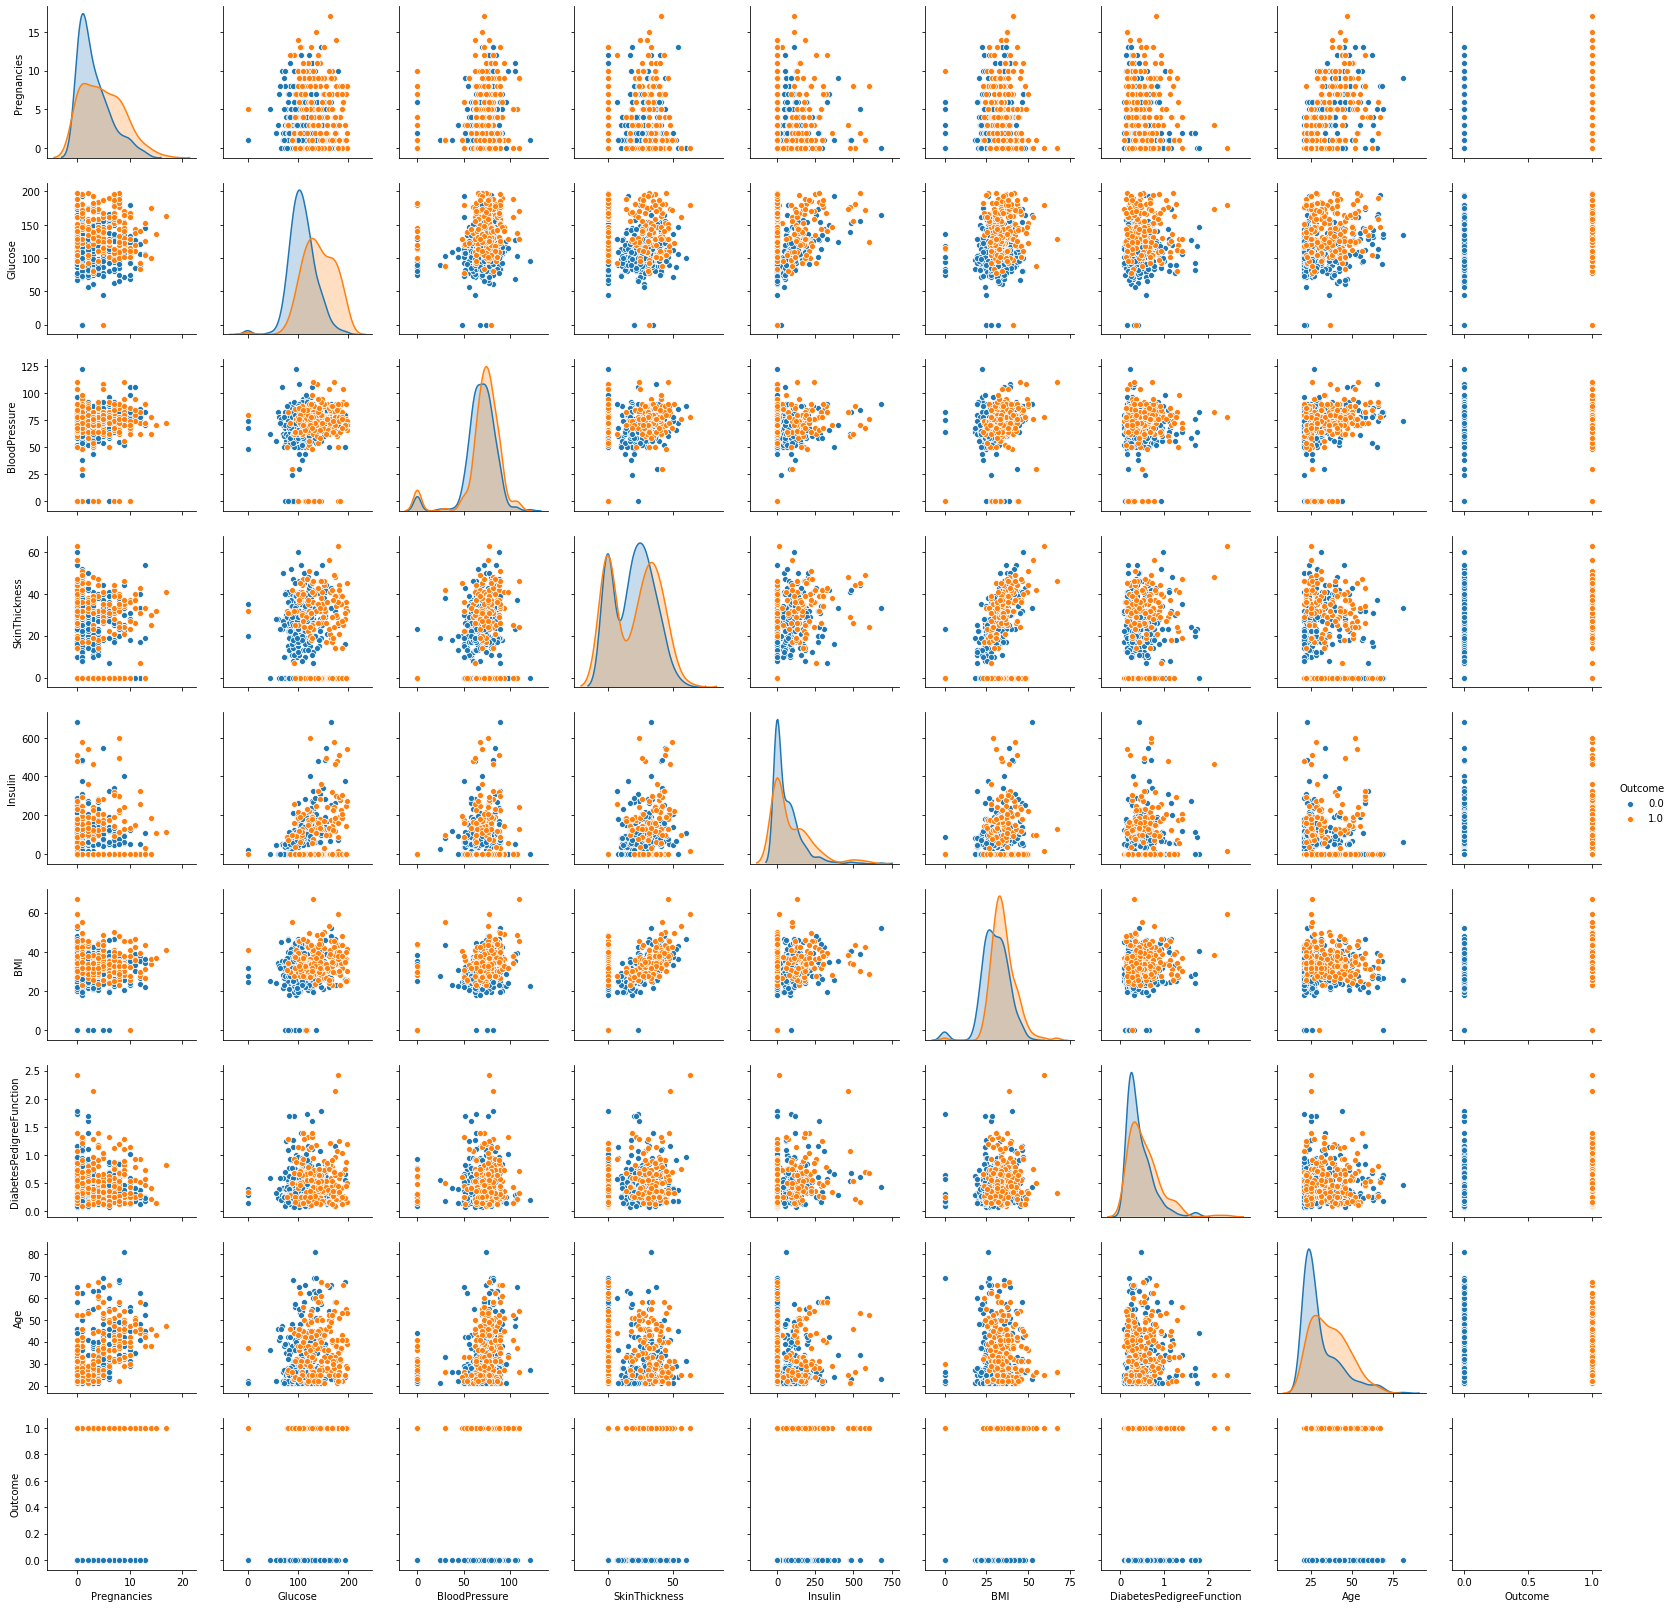

In [10]:
def main():

    trainingSet, testSet = readCSV()
    outcomegrp1, outcomegrp0 = splitOutcome(trainingSet)
    
    m1,sd1 = printMean_and_SD(outcomegrp1)
    m0,sd0 = printMean_and_SD(outcomegrp0)

    PredictedValues = CalculateColumnProb(m1,sd1,m0,sd0,testSet)
    testsetoutcome = testSet['Outcome'].tolist()
    
    valueAccuracy, TP, TN, FP, FN  = Prediction_Matching(PredictedValues, testsetoutcome)
    Analytics(TP, TN, FP, FN)
    
    print('Confusion Matrix:')
    print ('          ______________________________________________')
    print ('         |      Predicted:        |      Predicted:     |')
    print ('  n={0}  |          0             |          1          |'.format(TN+FN+FP+TP))
    print (' ________|________________________|_____________________|________')
    print ('| Actual:|                        |                     |        |')
    print ('|   0    |       TN = {0}         |       FP = {1}       |   {2}  |'.format(TN,FP,TN+FP))
    print ('|________|________________________|_____________________|________|')
    print ('| Actual:|                        |                     |        |')
    print ('|   1    |       FN = {0}          |       TP = {1}       |   {2}   |'.format(FN,TP,FN+TP))
    print ('|________|________________________|_____________________|________|')
    print ('         |         {0}            |         {1}         |'.format(TN+FN,FP+TP))
    print ('         |________________________|_____________________|')
    print()
    print()
    
    print('Data Visualization - Pair Plots: (Please wait for few seconds for the graphs to generate.)') 
    sn.pairplot(data=trainingSet,hue='Outcome') #Graphical representation of attribute clustering and linear separation of the dataset.
    
main()

### Our interpretation for the evaluated values:

Computing Accuracy, Sensitivity and Specificity help us determine the precision and efficiency of our classifier. Also, Sensitivity is a measure of how well the test predicts one category and Specificity measures how well the test predicts the other category.

Moreover, in the context of our given dataset, we observe that Sensitivity is low and Specificity is high which implies that the diabetic women must be re-examined to eliminate the false negatives i.e. diabetic women wrongly classified as non-diabetic.